## Splitting Outliers

### Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_metrics = pd.read_csv('../data/processed/customer_metrics.csv')

In [2]:
customer_metrics.head()

,Customer ID,TotalSpent,OrderCount,FirstInvoiceDate,LastInvoiceDate,CustomerLifespan,Recency,PurchaseFrequency
0,12346.0,169.36,2,2010-03-02 13:08:00,2010-06-28 13:53:00,118,164,0.51
1,12347.0,1323.32,2,2010-10-31 14:20:00,2010-12-07 14:57:00,37,2,1.62
2,12348.0,221.16,1,2010-09-27 14:59:00,2010-09-27 14:59:00,1,73,30.00
3,12349.0,2221.14,2,2010-04-29 13:20:00,2010-10-28 08:23:00,181,42,0.33
4,12351.0,300.93,1,2010-11-29 15:23:00,2010-11-29 15:23:00,1,10,30.00


### Visualizing Segmentation Features

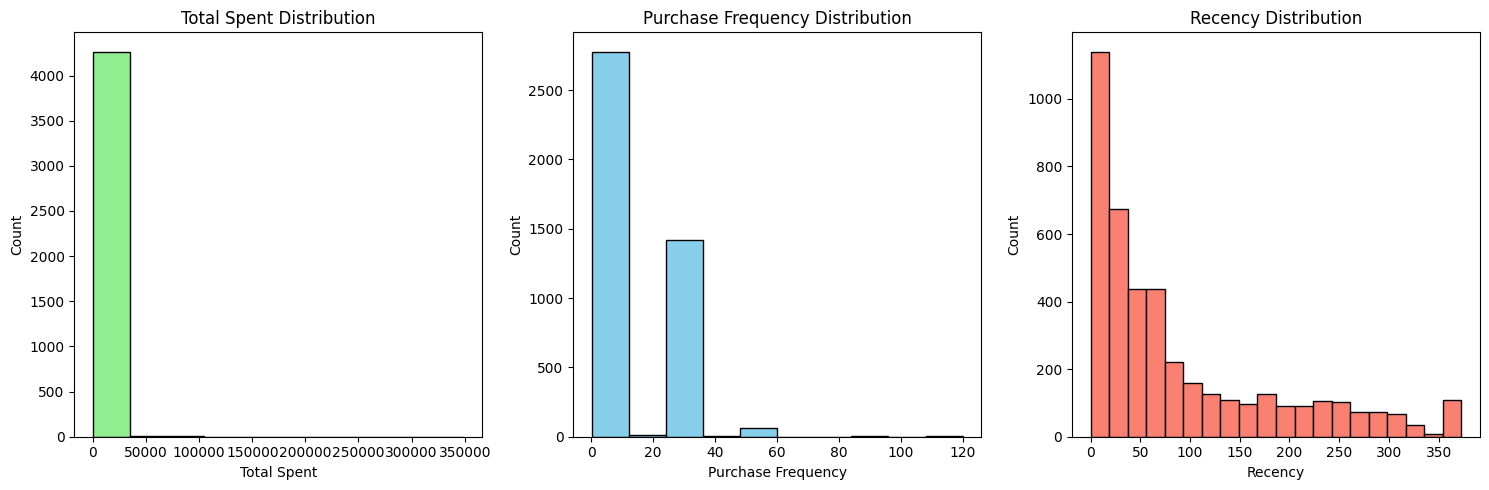

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) #r,c,current_col
plt.hist(customer_metrics['TotalSpent'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(customer_metrics['PurchaseFrequency'], bins=10, color='skyblue', edgecolor='black')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(customer_metrics['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Visualizing Feature Distribution

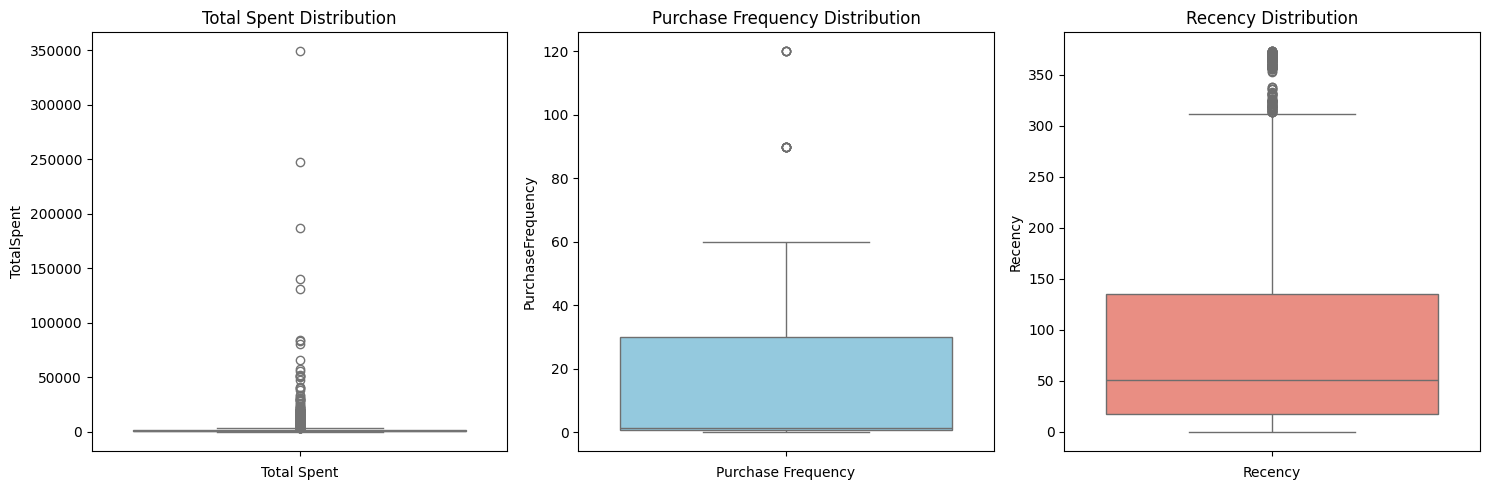

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=customer_metrics['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=customer_metrics['PurchaseFrequency'], color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=customer_metrics['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### Splitting Total Spent & Purchase Frequency

In [5]:
M_Q1 = customer_metrics['TotalSpent'].quantile(0.25) 
M_Q3 = customer_metrics['TotalSpent'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
total_spent_outliers_df = customer_metrics[(customer_metrics['TotalSpent'] > (M_Q3 + 1.5 * M_IQR)) |
                                           (customer_metrics['TotalSpent']  < (M_Q1 - 1.5 * M_IQR))].copy()
total_spent_outliers_df.describe()

,Customer ID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,15103.040189,12188.101740,17.167849,296.425532,30.035461,2.285296
std,1728.661406,25830.851045,19.729755,89.095367,51.541004,5.528559
min,12357.000000,3802.040000,1.000000,1.000000,0.000000,0.250000
25%,13622.000000,4605.940000,8.000000,258.000000,3.000000,0.900000
50%,14961.000000,6191.320000,12.000000,338.000000,13.000000,1.250000
75%,16692.000000,10273.235000,18.000000,359.000000,31.000000,1.930000
max,18260.000000,349164.350000,183.000000,373.000000,364.000000,90.000000


In [6]:
F_Q1 = customer_metrics['PurchaseFrequency'].quantile(0.25) 
F_Q3 = customer_metrics['PurchaseFrequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1
purchase_frequency_outliers_df = customer_metrics[(customer_metrics['PurchaseFrequency'] > (F_Q3 + 1.5 * F_IQR)) |
                                           (customer_metrics['PurchaseFrequency']  < (F_Q1 - 1.5 * F_IQR))].copy()
purchase_frequency_outliers_df.describe()

,Customer ID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,11.000000,11.000000,11.000000,11.0,11.000000,11.000000
mean,15838.454545,1822.202727,3.363636,1.0,147.454545,100.909091
std,1672.921419,2932.379207,0.504525,0.0,111.998539,15.135749
min,13187.000000,111.990000,3.000000,1.0,23.000000,90.000000
25%,14480.500000,336.710000,3.000000,1.0,65.000000,90.000000
50%,15959.000000,960.690000,3.000000,1.0,134.000000,90.000000
75%,17278.500000,1760.200000,4.000000,1.0,222.000000,120.000000
max,17945.000000,10396.500000,4.000000,1.0,331.000000,120.000000


In [7]:
non_outliers_df = customer_metrics[(~customer_metrics.index.isin(total_spent_outliers_df.index)) &
                                   (~customer_metrics.index.isin(purchase_frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,TotalSpent,OrderCount,CustomerLifespan,Recency,PurchaseFrequency
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,15382.953271,910.739506,3.029595,117.290498,95.942887,12.700005
std,1694.594219,843.967323,2.766543,124.166483,97.818290,15.166487
min,12346.000000,1.550000,1.000000,1.000000,0.000000,0.170000
25%,13919.750000,283.370000,1.000000,1.000000,21.000000,0.580000
50%,15393.500000,599.540000,2.000000,74.000000,57.000000,1.335000
75%,16862.250000,1305.442500,4.000000,226.000000,149.000000,30.000000
max,18287.000000,3788.210000,62.000000,373.000000,373.000000,60.000000


### Distribution After Split

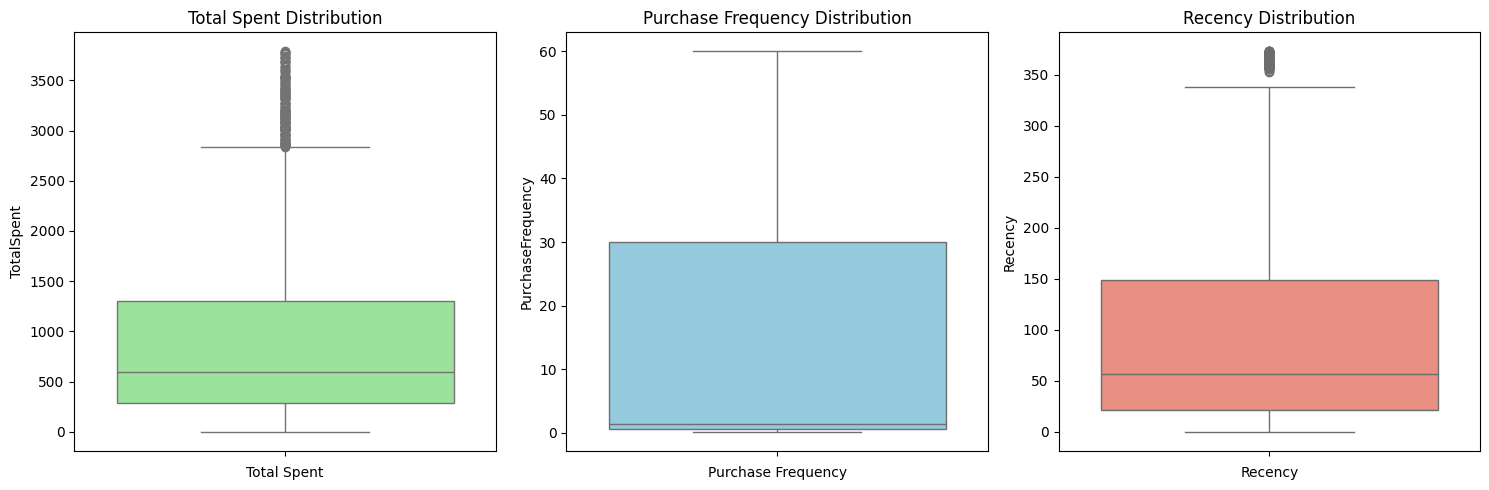

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=non_outliers_df['TotalSpent'], color='lightgreen')
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')

plt.subplot(1, 3, 2)
sns.boxplot(y=non_outliers_df['PurchaseFrequency'], color='skyblue')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show() 

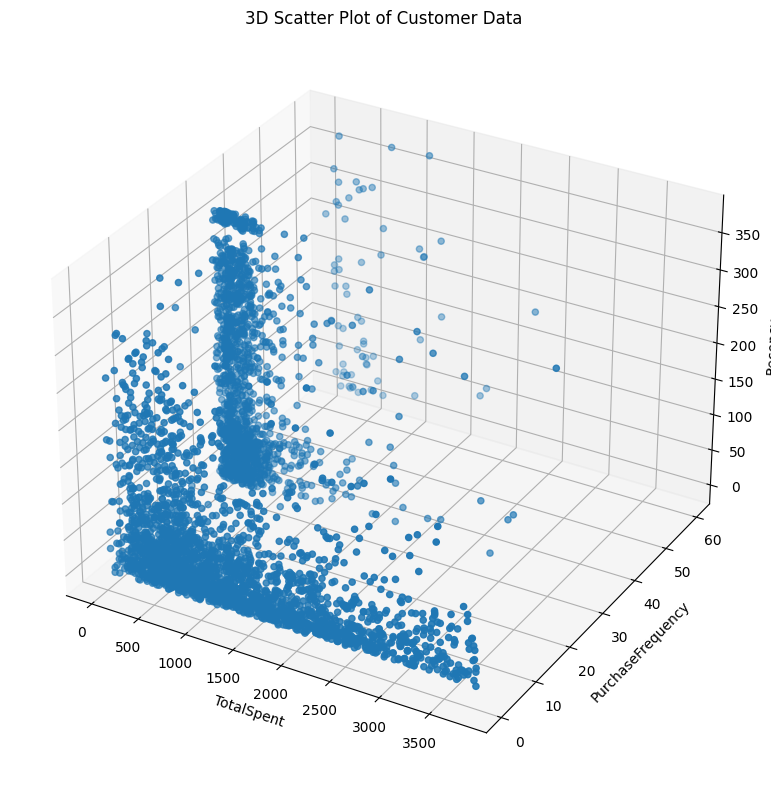

In [9]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(
  non_outliers_df['TotalSpent'],
  non_outliers_df['PurchaseFrequency'],
  non_outliers_df['Recency']
)
ax.set_xlabel('TotalSpent')
ax.set_ylabel('PurchaseFrequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.tight_layout()
plt.show()

### Exporting Data

In [10]:
non_outliers_df.to_csv('../data/processed/customer_metrics_without_outliers.csv', index=False)
total_spent_outliers_df.to_csv('../data/processed/high_value_outliers.csv', index=False)
purchase_frequency_outliers_df.to_csv('../data/processed/high_freq_outliers.csv', index=False)